# Project: Lifestyle Diseases in NYC
#### 02806 - Final Project

This iPython Notebook contains all relevant informations, calculations and evaluations used for creating the final project. All references will be hyper-links for the readers convinience.


## Motivation
### What is your dataset?
This project uses data from three different sources. 
1. A **GEOJSON file of New York City** with a polygon for each zip-code. Besides the zip-codes the dataset also contains information about which one of the five boroughs the zip-code is located in. [Link](http://data.beta.nyc/dataset/nyc-zip-code-tabulation-areas)
2. CSV containing **restaurant inspection data in NYC**. This dataset is used to find and locate the fast-food restaurants wihtin each zip-code. [Link](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/xx67-kt59)
3. Excel file with **disease information for each zipcode** in the state of New York. For each zip-code the number of people suffering from common diseases are listed. [Link](https://health.data.ny.gov/Health/Hospital-Inpatient-Prevention-Quality-Indicators-P/5q8c-d6xq)  From this dataset, the number of people suffering from the following life-style related diseases:
    - Hypertension
    - Heart failure
    - Long term diabetes
    - Short term diabetes




### Why did you choose this/these particular dataset(s)?
"...unhealthy lifestyle involving tobacco use, a lack of regular physical activity, and consumption of diets rich in highly saturated fats, sugars, and salt, typified by "fast foods." This lifestyle results in higher levels of risk factors, such as hypertension, dyslipidemia, diabetes, and obesity that act independently and synergistically." [*Krisela Steyn and Albertino Damasceno*, Disease and Mortality in Sub-Saharan Africa. 2nd edition. - "Lifestyle and Related Risk Factors for Chronic Diseases"]


Lifestyle related diseases is a vast growing problem in the western world and especially in the United States of America. 
This project aims to investigate the health of each zip-code in NYC usnig a data driven approach to find a correlation between lifestyle diseases and social economic relations. The main idea is thus that it is possible to predict the number of diseases within each zip-code and borough based on income data and the number of fastfood restaurants.

### What was your goal for the end user's experience?
Our goal is, that the user can gain information about the health and Social economics of New York in an intuitive and fun way while being introduced to machine learning principles.

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


data = [] # entire data set
with open(r'../csv/NycZip.csv','rb') as f:
    for row in csv.DictReader(f):
        data.append(row)
        
df = pd.DataFrame(data) 
df = df.convert_objects(convert_numeric=True);
df_withStr = df.drop(df.columns[[13,14]], 1) # remove zip code and total
df = df.drop(df.columns[[1,13,14]], 1) # remove zip code and total
df

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,avgIncome,diabetesLong,diabetesShort,fastFood,heartFailure,hypertension,incomeClass1,incomeClass2,incomeClass3,incomeClass4,incomeClass5,incomeClass6
0,40.488194,80.63,33.00,37.615741,203.39,38.50,0.497685,0.237558,0.125579,0.063657,0.063368,0.012153
1,63.605830,128.15,9.13,74.738416,247.17,82.39,0.300448,0.206278,0.170404,0.124066,0.171898,0.026906
2,93.626613,69.96,9.13,4.777831,322.30,60.83,0.283325,0.165313,0.132824,0.104157,0.231247,0.083134
3,57.676035,91.96,52.58,43.572985,256.30,72.27,0.370370,0.204793,0.137255,0.106754,0.159041,0.021786
4,54.951215,97.24,47.19,4.957858,218.02,32.45,0.406049,0.213188,0.137333,0.093208,0.125434,0.024789
5,31.764860,84.70,30.25,32.593196,124.52,55.66,0.574862,0.236504,0.100428,0.046445,0.037686,0.004074
6,82.886896,126.50,31.57,0.000000,311.63,72.27,0.291362,0.177892,0.137628,0.103953,0.215959,0.073206
7,85.221230,110.66,15.51,39.682540,226.60,81.29,0.271542,0.182256,0.166100,0.121599,0.187642,0.070862
8,54.788512,178.97,27.17,52.219321,287.43,135.63,0.372498,0.235857,0.157528,0.096606,0.113142,0.024369
9,56.294874,104.94,16.17,26.978417,247.50,102.19,0.369155,0.223921,0.165917,0.100719,0.116007,0.024281


We expect the data set to contain several missing values and maybe also some outliers. An initial stacked bar chart confirms this suspection

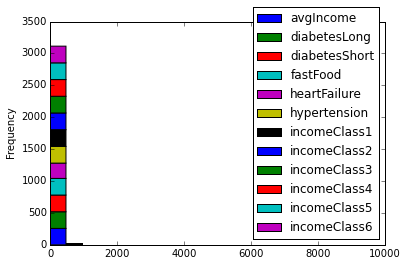

In [2]:
plt.figure();
df.plot.hist(stacked=True, bins=20)

## Basic Statistics: An Overview of the Data Set
Performing basic statistics and visualization help improve the overall understanding of the data set. An interesting first approach is to visualize the prior distribution of each feature along with the correlation between each feature. This can be achieved by the scatter plot matrix from the [**Pandas** library](http://pandas.pydata.org/pandas-docs/stable/visualization.html). In order to quantify the correlation one can calculate the Pearsons correlation coefficient. Pearsons correlation $\rho_{X,Y} $ maseasure the linear correlation between two variables X and Y, giving a value between +1 and −1 inclusive, where 1 is total positive correlation, 0 is no correlation, and −1 is total negative correlation [ref](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient). 

$$ \rho_{X,Y} = \frac{cov(X,Y)}{\sigma_X \dot \sigma_Y} $$

where *cov(X,Y)* is the covariance between feature X and Y. This coefficient is easily calculated using the [**Pandas** library](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html). 

Another very usefull approach is to visualize the features using a box plot. Not only does the box plot provide information about the distribution of each feature (using the quantiles), it also proves to be a usefull tool in outlier detection [*Pang-Ning Tan*; Introduction to data mining, 2006].

The data set contains a lot missing data point. This is the result of combining multiple different data set which unfortunately didn't match completely. To compensate for the missing values any observation that includes a missing values is removed from the data set. The significant drawback of this approach is that the already sparse data set is now further reduced. The complete data set now contains 12 features and 155 observations.

Lastly the data is standardized as part of the preprocessing step. Standardization is performed by subtracting the mean from each feature and divide any non-constant feature by its standard deviation [ref]().

$$X_{normalized} = \frac{X-\mu_X}{\sigma_X} $$

By standardizing the data each feature now opperates on comparable scales.

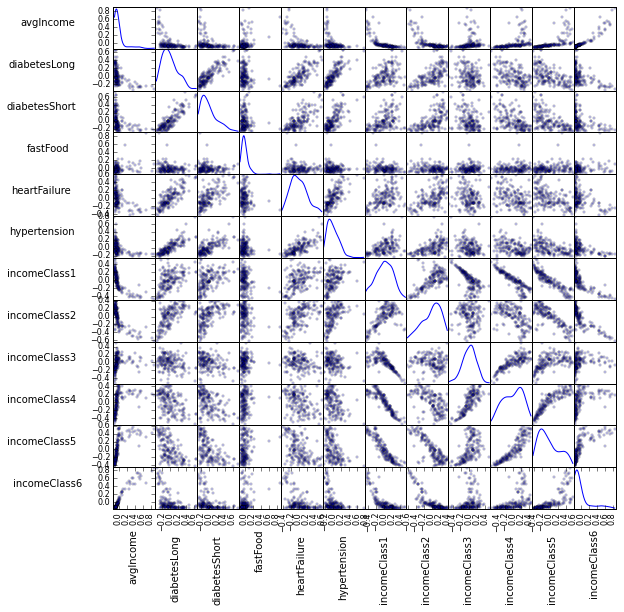

In [5]:
from __future__ import division
from pandas.tools.plotting import scatter_matrix

df1 = df
df = df[df>0].dropna(how='any') # remove columns with missing information
df_withStr = df_withStr[df_withStr>0].dropna(how='any') # remove columns with missing information
df_norm = (df - df.mean()) / (df.max() - df.min()) # standardization

axs = scatter_matrix(df_norm, alpha=0.2,figsize=(9, 9),diagonal='kde')
n = len(df.columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50

#### Scatter Matrix
From the scatter matrix we can see that some of the features or variables have skewed distributions and seem correlated with each other. Let's have a closer look at the following features ['avgIncome','diabetesLong', 'diabetesShort','fastfood'].

Looking at the distribution of average income in NYC it is easy to see how the "american model" affects the general population. The absolute majority of NYC districts have a relatively low income. The mid and high level incomes are restricted to minority.

Clearly the two types of diabetes are very much correlated with a Pearson correlation coeficient of 0.87.
Furthermore it seems that the distribution of the features 'avgIncome' and 'fastFood' are skewed and have long tails.

It is possible to account for the long right-sided tails using a log-transformation (or a sqrt-transformation) of the specific features. Wether or not this will assist in the upcoming machine learning tasks in currently unknown. 

Below is an illustrated example of log- and sqrt-transformation of the 'avgIncome' feature.

Pearson correlation between diabetesLong and diabetesShort:  0.860371816837


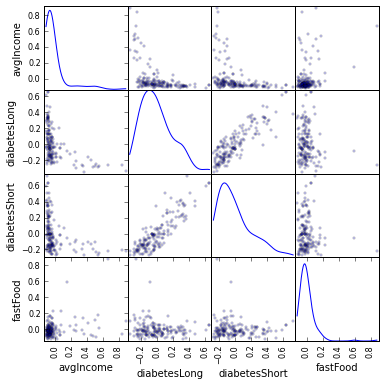

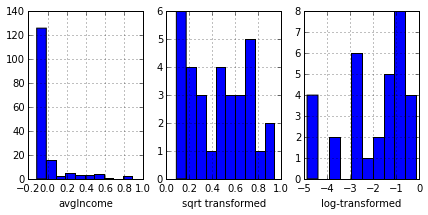

In [6]:
plt.figure(figsize=(4,4));
scatter_matrix(df_norm[['avgIncome','diabetesLong', 'diabetesShort','fastFood']], alpha=0.2,
               figsize=(6, 6),diagonal='kde'); # larger view

## calculate pearson's correlation
print 'Pearson correlation between diabetesLong and diabetesShort: ',df_norm['diabetesLong'].corr(df_norm['diabetesShort']);

plt.figure(figsize=(7,3));
plt.subplot(1, 3, 1);
df_norm['avgIncome'].hist(bins=10);
plt.xlabel('avgIncome');

plt.subplot(1, 3, 2);
df_norm['avgIncome'].apply(np.sqrt).hist(bins=10);
plt.xlabel('sqrt transformed');

plt.subplot(1, 3, 3);
df_norm['avgIncome'].apply(np.log).hist(bins=10);
plt.xlabel('log-transformed');

Box plot of the data *before* normalization and *before* missing values have been removed.

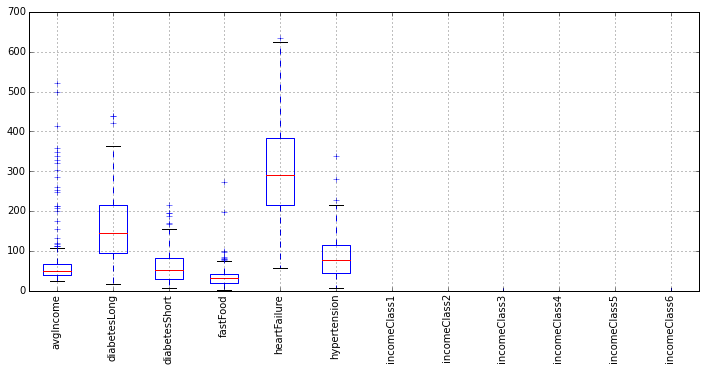

In [7]:
fig = plt.figure(figsize=(12,5))
df1.boxplot(return_type='axes');
plt.xticks(rotation='vertical');

Box plot of the data *after* normalization and *after* missing values have been removed.

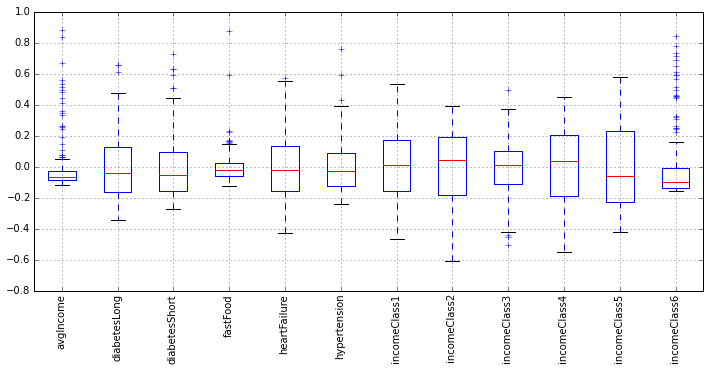

In [8]:
fig = plt.figure(figsize=(12,5))
df_norm.boxplot(return_type='axes');
plt.xticks(rotation='vertical');

## Theory

A common danger in machine learning is *overfitting*, meaning to produce a model that performs well on the data used to
train the model but generalizes poorly to any new data [*Joel Grus*; Data Science from Scratch, 2015]. The most common
approach to compensate for this problem is by splitting the data into training and test sets. Hereby the model is trained
on some portion of the data and tested on some other portion of the data. This gives a better indication of model performance.
This approach can be further developed using cross validation. In this approach each record is used the same nunber of times for training and exactly once for testing [*Pang-Ning Tan*; Introduction to data mining, 2006].


In this project a 10 fold cross validation is performed on each model in order to evalutate performance. The final performance
is the average of the performance in the 10 fold cross validation. 



### Decision Tree Classifier
This section aims to use a decision tree classifier to predict the borough of an observation based on the features of the data set. This is a 5 class problem with one of the 5 boroughs as output target. 

A decision tree classifier uses a tree structure to represent a number of possible decision paths and an outcome for each path [*Joel Grus*; Data Science from Scratch, 2015].
Starting from a "parrent node" each split now devides the observations into smaller fractions called child nodes. 
When creating the different decision paths the classifier needs a criterion to optimize. Each split is now the result
of optimizing this criterion with respect to the possible splits [*Pang-Ning Tan*; Introduction to data mining, 2006].

The [**sklearn** library](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) features two diffenrent split criterions: Gini and entropy. Common for these measures are
that they express the impurity in the child node after the split. This means that a uniform distribution of classes in the
child node gives the highest impurity.


The Gini impurity is given by 

$$ Gini(t) = 1 - \sum^{c-1}_{i=0} [p(i|t)]^2 $$

The Entropy is given by 

$$ Entropy(t) = - \sum^{c-1}_{i=0} p(i|t)log_{2}p(i|t) $$

where $p(i|t)$ denotes the fraction of records belonging to class i at a given node t ,and c denotes the number of classes [*Pang-Ning Tan*; Introduction to data mining, 2006]. 

The implementation of the decision tree follows from the 
[**sklearn** library](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). The performance of the model is evaluted based on the model accuracy. In order to generalize the results the data is split into a training and a test set, and a 10 fold cross validation is performed.

**Gini impurity**
* Test accuracy: 47.0 %
* Training accuracy: 74.7 %


**Entropy**
* Test accuracy: 43.9 %
* Training accuracy: 72.2 %

In [191]:
def rules(clf, features, labels, node_index=0):
    """Structure of rules in a fit decision tree classifier

    Parameters
    ----------
    clf : DecisionTreeClassifier
        A tree that has already been fit.

    features, labels : lists of str
        The names of the features and labels, respectively.

    """
    node = {}
    if clf.tree_.children_left[node_index] == -1:  # indicates leaf
        count_labels = zip(clf.tree_.value[node_index, 0], labels)
        node['name'] = ', '.join(('{} of {}'.format(int(count), label)
                                  for count, label in count_labels if count>0))
        node['count']=[count[0] for count in count_labels]
        node['borough']=[label[1] for label in count_labels]
    else:
        feature = features[clf.tree_.feature[node_index]]
        threshold = round(clf.tree_.threshold[node_index],4)
        node['name'] = '{} > {}'.format(feature, threshold)
        left_index = clf.tree_.children_left[node_index]
        right_index = clf.tree_.children_right[node_index]
        node['children'] = [rules(clf, features, labels, right_index),
                            rules(clf, features, labels, left_index)]
    return node

from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split,cross_val_score
from collections import Counter
from __future__ import division
import json

# Get training and test set
X = df.values
y = df_withStr['borough'].values

# Train classifier 
clf = DecisionTreeClassifier(criterion='gini',max_depth=5)

# Perform ten-fold cross validation
scores = cross_val_score(clf,X,y, cv=10)

# Make predictions for visualization
clf.fit(X, y)
predictedClass = clf.predict(X)


print '-----Gini impurity-----\n\nTraining error'
def printPredict(predictedClass,y_test):
    rightPredict = Counter(predictedClass == y_test)
    print 'True: {:17.3f}\nFalse: {:16.3f}\nAccuracy: {:13.3f}'.format\
    (rightPredict[1], rightPredict[0],rightPredict[1]/(rightPredict[1]+rightPredict[0]) )

# Print training error    
printPredict(predictedClass,y)

# Print test error
print '\nTest error using 10-fold crossvalidation'
print np.mean(scores)

r = rules(clf,list(df),['Manhattan','Staten Island','Queens','Bronx ','Brooklyn'])
with open('rules.json', 'w') as f:
    f.write(json.dumps(r))

-----Gini impurity-----

Training error
True:           121.000
False:           41.000
Accuracy:         0.747

Test error using 10-fold crossvalidation
0.470060331825


In [10]:
# Train classifier 
clf = DecisionTreeClassifier(criterion='entropy',max_depth=5)

# Perform ten-fold cross validation
scores = cross_val_score(clf,X,y, cv=10)

# Make predictions for visualization
clf.fit(X, y)
predictedClass = clf.predict(X)


print '-----Entropy-----\n\nTraining error'
def printPredict(predictedClass,y_test):
    rightPredict = Counter(predictedClass == y_test)
    print 'True: {:17.3f}\nFalse: {:16.3f}\nAccuracy: {:13.3f}'.format\
    (rightPredict[1], rightPredict[0],rightPredict[1]/(rightPredict[1]+rightPredict[0]) )

# Print training error    
printPredict(predictedClass,y)

# Print test error
print '\nTest error using 10-fold crossvalidation'
print np.mean(scores)

-----Entropy-----

Training error
True:           117.000
False:           45.000
Accuracy:         0.722

Test error using 10-fold crossvalidation
0.439125188537


### Linear Regression

Whereas classification focuses on predicting a class, regression predicts on or more continuous taget variables. The aim of this section is to predict the occurance of heart failure based on income statistics and the number of fast food restaurants in each borough.

Two different linear models are evaluated; a multiple linear model and a ridge regression. 

In **linear regression** the model is fitted to the data using a polynomial function

$$ y(x,\mathbf{w}) = w_0 + w_1x + w_2x^2 + ... + w_Mx^M = \sum^M_{j=0}w_jx^j$$

The polynomial coefficients, $\mathbf{w}$, are then determined by fitting the polynomial to the training data.
In order to fit the model an error function $E(\mathbf{w})$ is minimized. The genreal choice of error fucntion in linear regression is the sum of squrred errors.

$$E(\mathbf{w}) = \frac{1}{2}\sum^N_{n=1}\{y(x_n,\mathbf{w})-t_n\}^2 $$

with $y(x_n,\mathbf{w})$ being the predicted target value and $t_n$ being the target value. [**sklearn** library](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)

As an alternative to linear regression a **ridge regression** model is proposed. Ridge regression addresses some of the problems of ordinary least squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

$$E(\mathbf{w},\alpha) = ||X\mathbf{w}-y||^2_2 + \alpha ||\mathbf{w}||^2_2 $$

here $\alpha \geq 0$ is a complexity parameter that controls the penalty. The larger $\alpha$ the more robust the coefficients [Ref](http://scikit-learn.org/stable/modules/linear_model.html).

The performance of the models are evaulated based the the coefficient of determination $(R^2)$. In a linear model the $R^2$ value is a measure of the global fit of the model. Specifically, $R^2$ is an element of [0, 1] and represents the proportion of variability in Y that may be attributed to some linear combination of the regressors (explanatory variables) in X 
[Ref](https://en.wikipedia.org/wiki/Coefficient_of_determination#In_a_non-simple_linear_model).

To generalize the performance measure the data is split into a training set and a test set, and a 10 fold cross validation is performed.

* Ridge Regression Model ($R^2$): 
* Multiple Linear Model ($R^2$): 

In [107]:
from collections import Counter
from sklearn import linear_model, preprocessing
from sklearn.cross_validation import train_test_split

#features = ['fastFood','heartFailure','diabetesShort','diabetesLong','hypertension'] # features for multiple regression
features = ['avgIncome','fastFood','incomeClass1','incomeClass2','incomeClass3','incomeClass4','incomeClass5','incomeClass6']


X = df_norm[features].values
y = df_norm['heartFailure'].values
regr = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state = 1)
scores = cross_val_score(regr,X,y, cv=10)

regr.fit(X_train,y_train)

print 'Coefficients: \n', regr.coef_
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print '\nTraining'
print('Variance score: %.2f' % regr.score(X_train, y_train))
print '\nTest'
print('Variance score: %.2f' % regr.score(X_test, y_test))



Coefficients: 
[-0.57833637  0.06145161 -0.2670203   0.61397601 -0.38674155 -0.00505606
 -0.02325427  0.34348724]
Residual sum of squares: 0.02

Training
Variance score: 0.33

Test
Variance score: 0.34


#### Ridge regression
A for-loop is used to itterate over different values of $\alpha$. The performance is measured as the $R^2$ value of the test set.

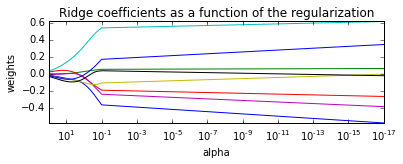

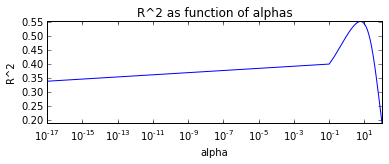

best alpha is:  6.00600600601


In [129]:
# Split data into traning and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state = 1)

# Train linear Bayesian model
#regr = BayesianRidge(compute_score=True,lambda_1=1e-1)
Ridgeregr = linear_model.Ridge ()
alphas = np.linspace(1e-17,100,1000)

scores = []
coefs = []
for ii in alphas:
    Ridgeregr.set_params(alpha=ii)
    Ridgeregr.fit(X_train,y_train)
    scores.append(Ridgeregr.score(X_test,y_test))
    coefs.append(Ridgeregr.coef_)

plt.figure()
plt.subplot(211)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

plt.subplot(212)
ax = plt.gca()
ax.plot(alphas,scores)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.title('R^2 as function of alphas')
plt.axis('tight')
plt.show()

idx = scores.index(max(scores)) # idx of best score
b_alpha = alphas[idx] # best alpha
print 'best alpha is: ', b_alpha

From above analysis it seems that alpha should be 6.006

In [130]:
Ridgeregr.set_params(alpha = b_alpha)
y2 = Ridgeregr.fit(X_train, y_train)

# Evaluation
print 'Coefficients: \n', Ridgeregr.coef_
print("Residual sum of squares: %.2f"
      % np.mean((Ridgeregr.predict(X_test) - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score (train): %.2f' % Ridgeregr.score(X_train,y_train))
print('Variance score (test): %.2f' % Ridgeregr.score(X_test, y_test))




Coefficients: 
[-0.06292295  0.00504894  0.03001146  0.16850071  0.00263995 -0.0685041
 -0.09591845 -0.06439112]
Residual sum of squares: 0.01
Variance score (test): 0.55
Variance score (train): 0.28


The two models are then plotted against the true values to enable visual inspection of the result.

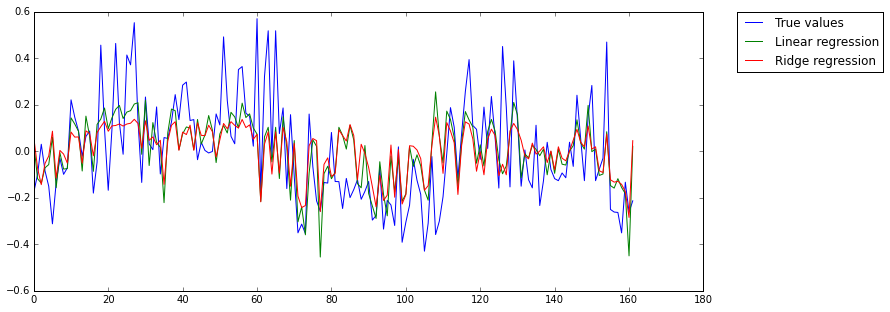

In [127]:
y_est = regr.predict(X)
y_estRidge = Ridgeregr.predict(X)
fig = plt.figure(figsize=(12,5))
plt.plot(range(len(y)),y,label = 'True values')
plt.plot(range(len(y_est)),y_est,label = 'Linear regression')
plt.plot(range(len(y_est)),y_estRidge,label = 'Ridge regression')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#plt.savefig('linearRegression.png', dpi=300, bbox_inches='tight') # Used to save figure

## Visualization
* Explain the visualizations you've chosen.
* Why are they right for the story you want to tell?

To give a better overview of the data an interactive map is created. The map is created from a GEOJSON file containing the geometric representation of each zip-code in NYC. By concattinating our data set to the JSON file it is possible to give the user an interactive experience when exploring the data.

The decision tree has some nice visual properties which can be utelized in d3.js. The tree like structure can unfolded or collapsed based on the users request, and each split is easily explained on top of each node. Further as the data is based on health and economic statistics, it is interesting to see if the difference between boroughs is large enough to distinguish from the large intra-borough variance. This makes the decision tree classifier suitable for this project. 

Linear regression has some limitations when it comes to visualization. As the dimensionallity of the data is far beyond the visable 3D, it is not possible to visualize the models. To compensate for this, a visualization of the individual features and their distributions and correlation to other features, are created using a scatter plot matrix. 

The overall story suggest that 



## Discussion 
### What went well?
First of all, we were able to collect and merge data from multiple data source, which enabled us to gain information about the health of New York City.
Based on the data we managed to make an awesome interactive map, that illustrates the features used in this project. The map also shows that there seems to be some kind of correlation between the number of heart failures in a zip code and the average income. Also we made a nice D3 illustration of a decision tree capable of predicting the boroughs with a training accuracy of 74.7 %.


### What is still missing? What could be improved?, Why?
Even though some of the lower income classes showed a positive correlation with the two types of diabetes and some of the higher income classes showed a negative correlation with the two types of diabetes, it doesn't seem like enough features are included in order to successfully predict the health level.
The huge amount of factors influencing the health of an individual like genes, environment, food consumption, educational level etc. seem to complex to predict using only income data and fast-food restaurants data. We really wanted to include body mass index (BMI) and data about smoking and drinking habits within each zip-code, but we couldn't find any valid data sources.
For further investigation it would be interesting to investigate if any correlation existed between lifestyle related diseases and crime data and data about educational level.

